In [1]:
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt 
import torch
from torch import nn
import torch.nn.functional as F
from torch.utils.data import Dataset,DataLoader,TensorDataset



#样本数量
n = 400

# 生成测试用数据集
X = 10*torch.rand([n,2])-5.0  #torch.rand是均匀分布 
w0 = torch.tensor([[2.0],[-3.0]])
b0 = torch.tensor([[10.0]])
Y = X@w0 + b0 + torch.normal( 0.0,2.0,size = [n,1])  # @表示矩阵乘法,增加正态扰动

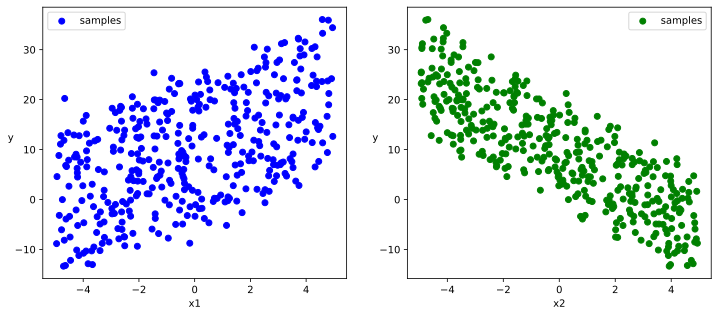

In [2]:
# 数据可视化

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

plt.figure(figsize = (12,5))
ax1 = plt.subplot(121)
ax1.scatter(X[:,0],Y[:,0], c = "b",label = "samples")
ax1.legend()
plt.xlabel("x1")
plt.ylabel("y",rotation = 0)

ax2 = plt.subplot(122)
ax2.scatter(X[:,1],Y[:,0], c = "g",label = "samples")
ax2.legend()
plt.xlabel("x2")
plt.ylabel("y",rotation = 0)
plt.show()

In [3]:
#构建输入数据管道
ds = TensorDataset(X,Y)
ds_train,ds_valid = torch.utils.data.random_split(ds,[int(400*0.7),400-int(400*0.7)])
# ！！！看这个，关键！！！！
# ！！！看这个，关键！！！！
# ！！！看这个，关键！！！！
dl_train = DataLoader(ds_train,batch_size = 10,shuffle=True,num_workers=2)
# ！！！看这个，关键！！！！
# ！！！看这个，关键！！！！
# ！！！看这个，关键！！！！
dl_valid = DataLoader(ds_valid,batch_size = 10,num_workers=2)
# ！！！看这个，关键！！！！
# ！！！看这个，关键！！！！
# ！！！看这个，关键！！！！

In [4]:
# 继承用户自定义模型
from torchkeras import Model
class LinearRegression(Model):
    def __init__(self):
        super(LinearRegression, self).__init__()
        self.fc = nn.Linear(2,1)
    
    def forward(self,x):
        return self.fc(x)

model = LinearRegression()

In [5]:
model.summary(input_shape = (2,))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                    [-1, 1]               3
Total params: 3
Trainable params: 3
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.000008
Forward/backward pass size (MB): 0.000008
Params size (MB): 0.000011
Estimated Total Size (MB): 0.000027
----------------------------------------------------------------


In [6]:
### 使用fit方法进行训练
# ！！！看这个，关键！！！！
# ！！！看这个，关键！！！！
# ！！！看这个，关键！！！！

def mean_absolute_error(y_pred,y_true):
    return torch.mean(torch.abs(y_pred-y_true))

def mean_absolute_percent_error(y_pred,y_true):
    absolute_percent_error = (torch.abs(y_pred-y_true)+1e-7)/(torch.abs(y_true)+1e-7)
    return torch.mean(absolute_percent_error)

model.compile(loss_func = nn.MSELoss(),# ！！！看这个，关键！！！！
                                      # ！！！看这个，关键！！！！
                                      # ！！！看这个，关键！！！！
              optimizer= torch.optim.Adam(model.parameters(),lr = 0.01),
              metrics_dict={"mae":mean_absolute_error,"mape":mean_absolute_percent_error})

dfhistory = model.fit(200,dl_train = dl_train, dl_val = dl_valid,log_step_freq = 20)

Start Training ...

================================================================================2021-09-27 12:27:15
{'step': 20, 'loss': 223.91, 'mae': 12.407, 'mape': 1.425}

 +-------+---------+--------+-------+----------+---------+----------+
| epoch |   loss  |  mae   |  mape | val_loss | val_mae | val_mape |
+-------+---------+--------+-------+----------+---------+----------+
|   1   | 223.276 | 12.344 | 1.334 | 242.481  |  12.677 |  1.225   |
+-------+---------+--------+-------+----------+---------+----------+

================================================================================2021-09-27 12:27:16
{'step': 20, 'loss': 208.907, 'mae': 11.888, 'mape': 1.259}

 +-------+---------+--------+-------+----------+---------+----------+
| epoch |   loss  |  mae   |  mape | val_loss | val_mae | val_mape |
+-------+---------+--------+-------+----------+---------+----------+
|   2   | 200.941 | 11.723 | 1.205 | 217.102  |  12.062 |  1.279   |
+-------+---------+--------+-------

{'step': 20, 'loss': 46.807, 'mae': 6.382, 'mape': 1.328}

 +-------+--------+-------+-------+----------+---------+----------+
| epoch |  loss  |  mae  |  mape | val_loss | val_mae | val_mape |
+-------+--------+-------+-------+----------+---------+----------+
|   18  | 45.876 | 6.283 | 2.126 |  47.503  |  6.437  |  1.975   |
+-------+--------+-------+-------+----------+---------+----------+

================================================================================2021-09-27 12:27:40
{'step': 20, 'loss': 41.996, 'mae': 5.976, 'mape': 1.35}

 +-------+--------+-------+-------+----------+---------+----------+
| epoch |  loss  |  mae  |  mape | val_loss | val_mae | val_mape |
+-------+--------+-------+-------+----------+---------+----------+
|   19  | 42.846 | 6.075 | 2.092 |  44.277  |  6.222  |  1.956   |
+-------+--------+-------+-------+----------+---------+----------+

================================================================================2021-09-27 12:27:41
{'step': 

{'step': 20, 'loss': 15.935, 'mae': 3.477, 'mape': 0.789}

 +-------+--------+-------+-------+----------+---------+----------+
| epoch |  loss  |  mae  |  mape | val_loss | val_mae | val_mape |
+-------+--------+-------+-------+----------+---------+----------+
|   35  | 15.144 | 3.384 | 1.261 |  15.186  |  3.377  |  1.204   |
+-------+--------+-------+-------+----------+---------+----------+

================================================================================2021-09-27 12:28:04
{'step': 20, 'loss': 14.025, 'mae': 3.211, 'mape': 1.508}

 +-------+--------+-------+-------+----------+---------+----------+
| epoch |  loss  |  mae  |  mape | val_loss | val_mae | val_mape |
+-------+--------+-------+-------+----------+---------+----------+
|   36  | 14.218 | 3.261 | 1.224 |  14.264  |  3.246  |  1.155   |
+-------+--------+-------+-------+----------+---------+----------+

================================================================================2021-09-27 12:28:05
{'step':

{'step': 20, 'loss': 6.026, 'mae': 1.987, 'mape': 0.627}

 +-------+-------+-------+-------+----------+---------+----------+
| epoch |  loss |  mae  |  mape | val_loss | val_mae | val_mape |
+-------+-------+-------+-------+----------+---------+----------+
|   52  | 6.302 | 2.054 | 0.833 |  6.076   |  1.978  |  0.679   |
+-------+-------+-------+-------+----------+---------+----------+

================================================================================2021-09-27 12:28:27
{'step': 20, 'loss': 6.637, 'mae': 2.121, 'mape': 0.654}

 +-------+-------+-------+-------+----------+---------+----------+
| epoch |  loss |  mae  |  mape | val_loss | val_mae | val_mape |
+-------+-------+-------+-------+----------+---------+----------+
|   53  | 6.098 | 2.016 | 0.826 |  5.869   |  1.948  |  0.662   |
+-------+-------+-------+-------+----------+---------+----------+

================================================================================2021-09-27 12:28:28
{'step': 20, 'loss':

{'step': 20, 'loss': 4.414, 'mae': 1.702, 'mape': 0.849}

 +-------+-------+-------+-------+----------+---------+----------+
| epoch |  loss |  mae  |  mape | val_loss | val_mae | val_mape |
+-------+-------+-------+-------+----------+---------+----------+
|   69  | 4.613 | 1.724 | 0.718 |  4.235   |  1.681  |  0.522   |
+-------+-------+-------+-------+----------+---------+----------+

================================================================================2021-09-27 12:28:51
{'step': 20, 'loss': 4.648, 'mae': 1.723, 'mape': 0.645}

 +-------+-------+-------+-------+----------+---------+----------+
| epoch |  loss |  mae  |  mape | val_loss | val_mae | val_mape |
+-------+-------+-------+-------+----------+---------+----------+
|   70  | 4.594 | 1.718 | 0.725 |  4.199   |  1.676  |   0.52   |
+-------+-------+-------+-------+----------+---------+----------+

================================================================================2021-09-27 12:28:53
{'step': 20, 'loss':

{'step': 20, 'loss': 4.319, 'mae': 1.675, 'mape': 0.734}

 +-------+-------+-------+-------+----------+---------+----------+
| epoch |  loss |  mae  |  mape | val_loss | val_mae | val_mape |
+-------+-------+-------+-------+----------+---------+----------+
|   86  | 4.443 | 1.688 | 0.706 |  3.991   |  1.627  |  0.472   |
+-------+-------+-------+-------+----------+---------+----------+

================================================================================2021-09-27 12:29:16
{'step': 20, 'loss': 4.781, 'mae': 1.77, 'mape': 0.9}

 +-------+-------+-------+-------+----------+---------+----------+
| epoch |  loss |  mae  |  mape | val_loss | val_mae | val_mape |
+-------+-------+-------+-------+----------+---------+----------+
|   87  | 4.438 | 1.685 | 0.702 |  3.995   |  1.628  |  0.472   |
+-------+-------+-------+-------+----------+---------+----------+

================================================================================2021-09-27 12:29:18
{'step': 20, 'loss': 4.

{'step': 20, 'loss': 4.662, 'mae': 1.754, 'mape': 0.616}

 +-------+-------+-------+-------+----------+---------+----------+
| epoch |  loss |  mae  |  mape | val_loss | val_mae | val_mape |
+-------+-------+-------+-------+----------+---------+----------+
|  103  | 4.444 | 1.684 | 0.705 |  3.949   |  1.621  |  0.473   |
+-------+-------+-------+-------+----------+---------+----------+

================================================================================2021-09-27 12:29:40
{'step': 20, 'loss': 4.577, 'mae': 1.707, 'mape': 0.834}

 +-------+-------+-------+------+----------+---------+----------+
| epoch |  loss |  mae  | mape | val_loss | val_mae | val_mape |
+-------+-------+-------+------+----------+---------+----------+
|  104  | 4.441 | 1.685 | 0.7  |  3.944   |  1.619  |  0.475   |
+-------+-------+-------+------+----------+---------+----------+

================================================================================2021-09-27 12:29:41
{'step': 20, 'loss': 4.57

{'step': 20, 'loss': 4.631, 'mae': 1.729, 'mape': 0.546}

 +-------+-------+-------+-------+----------+---------+----------+
| epoch |  loss |  mae  |  mape | val_loss | val_mae | val_mape |
+-------+-------+-------+-------+----------+---------+----------+
|  120  | 4.436 | 1.683 | 0.696 |  3.942   |  1.619  |  0.475   |
+-------+-------+-------+-------+----------+---------+----------+

================================================================================2021-09-27 12:30:04
{'step': 20, 'loss': 4.22, 'mae': 1.645, 'mape': 0.676}

 +-------+-------+-------+-------+----------+---------+----------+
| epoch |  loss |  mae  |  mape | val_loss | val_mae | val_mape |
+-------+-------+-------+-------+----------+---------+----------+
|  121  | 4.432 | 1.684 | 0.692 |  3.964   |  1.623  |  0.473   |
+-------+-------+-------+-------+----------+---------+----------+

================================================================================2021-09-27 12:30:05
{'step': 20, 'loss': 

{'step': 20, 'loss': 4.619, 'mae': 1.704, 'mape': 0.853}

 +-------+-------+-------+-------+----------+---------+----------+
| epoch |  loss |  mae  |  mape | val_loss | val_mae | val_mape |
+-------+-------+-------+-------+----------+---------+----------+
|  137  | 4.447 | 1.687 | 0.695 |  3.947   |  1.619  |  0.476   |
+-------+-------+-------+-------+----------+---------+----------+

================================================================================2021-09-27 12:30:28
{'step': 20, 'loss': 4.757, 'mae': 1.727, 'mape': 0.858}

 +-------+-------+-------+-------+----------+---------+----------+
| epoch |  loss |  mae  |  mape | val_loss | val_mae | val_mape |
+-------+-------+-------+-------+----------+---------+----------+
|  138  | 4.436 | 1.681 | 0.699 |  3.979   |  1.627  |   0.47   |
+-------+-------+-------+-------+----------+---------+----------+

================================================================================2021-09-27 12:30:29
{'step': 20, 'loss':

{'step': 20, 'loss': 4.676, 'mae': 1.73, 'mape': 0.814}

 +-------+-------+-------+-------+----------+---------+----------+
| epoch |  loss |  mae  |  mape | val_loss | val_mae | val_mape |
+-------+-------+-------+-------+----------+---------+----------+
|  154  | 4.437 | 1.681 | 0.702 |  3.976   |  1.625  |  0.471   |
+-------+-------+-------+-------+----------+---------+----------+

================================================================================2021-09-27 12:30:54
{'step': 20, 'loss': 4.177, 'mae': 1.611, 'mape': 0.862}

 +-------+-------+-------+-------+----------+---------+----------+
| epoch |  loss |  mae  |  mape | val_loss | val_mae | val_mape |
+-------+-------+-------+-------+----------+---------+----------+
|  155  | 4.446 | 1.683 | 0.705 |  3.988   |  1.628  |  0.472   |
+-------+-------+-------+-------+----------+---------+----------+

================================================================================2021-09-27 12:30:55
{'step': 20, 'loss': 

{'step': 20, 'loss': 4.429, 'mae': 1.648, 'mape': 0.55}

 +-------+-------+-------+------+----------+---------+----------+
| epoch |  loss |  mae  | mape | val_loss | val_mae | val_mape |
+-------+-------+-------+------+----------+---------+----------+
|  171  | 4.442 | 1.682 | 0.71 |  3.977   |  1.625  |  0.472   |
+-------+-------+-------+------+----------+---------+----------+

================================================================================2021-09-27 12:31:17
{'step': 20, 'loss': 4.799, 'mae': 1.742, 'mape': 0.833}

 +-------+-------+-------+-------+----------+---------+----------+
| epoch |  loss |  mae  |  mape | val_loss | val_mae | val_mape |
+-------+-------+-------+-------+----------+---------+----------+
|  172  | 4.433 | 1.683 | 0.698 |  3.928   |  1.616  |  0.476   |
+-------+-------+-------+-------+----------+---------+----------+

================================================================================2021-09-27 12:31:19
{'step': 20, 'loss': 4.431

{'step': 20, 'loss': 4.112, 'mae': 1.604, 'mape': 0.698}

 +-------+-------+-------+-------+----------+---------+----------+
| epoch |  loss |  mae  |  mape | val_loss | val_mae | val_mape |
+-------+-------+-------+-------+----------+---------+----------+
|  188  | 4.446 | 1.688 | 0.706 |  3.965   |  1.624  |  0.473   |
+-------+-------+-------+-------+----------+---------+----------+

================================================================================2021-09-27 12:31:40
{'step': 20, 'loss': 4.357, 'mae': 1.662, 'mape': 0.475}

 +-------+-------+-------+------+----------+---------+----------+
| epoch |  loss |  mae  | mape | val_loss | val_mae | val_mape |
+-------+-------+-------+------+----------+---------+----------+
|  189  | 4.438 | 1.683 | 0.7  |  3.963   |  1.623  |  0.473   |
+-------+-------+-------+------+----------+---------+----------+

================================================================================2021-09-27 12:31:42
{'step': 20, 'loss': 4.40

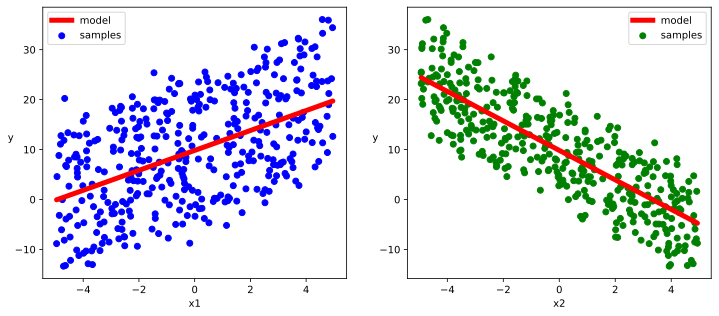

In [7]:
# 结果可视化

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

w,b = model.state_dict()["fc.weight"],model.state_dict()["fc.bias"]

plt.figure(figsize = (12,5))
ax1 = plt.subplot(121)
ax1.scatter(X[:,0],Y[:,0], c = "b",label = "samples")
ax1.plot(X[:,0],w[0,0]*X[:,0]+b[0],"-r",linewidth = 5.0,label = "model")
ax1.legend()
plt.xlabel("x1")
plt.ylabel("y",rotation = 0)


ax2 = plt.subplot(122)
ax2.scatter(X[:,1],Y[:,0], c = "g",label = "samples")
ax2.plot(X[:,1],w[0,1]*X[:,1]+b[0],"-r",linewidth = 5.0,label = "model")
ax2.legend()
plt.xlabel("x2")
plt.ylabel("y",rotation = 0)

plt.show()

In [8]:
dfhistory.tail()

,loss,mae,mape,val_loss,val_mae,val_mape
195,4.437333,1.684889,0.695674,3.951703,1.620187,0.473901
196,4.451729,1.686724,0.714884,4.001144,1.630835,0.470033
197,4.457794,1.687095,0.702756,3.931620,1.617612,0.474829
198,4.437006,1.682354,0.703855,3.982254,1.626630,0.471143
199,4.437902,1.683676,0.692270,3.960280,1.621983,0.474191


In [9]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

import matplotlib.pyplot as plt

def plot_metric(dfhistory, metric):
    train_metrics = dfhistory[metric]
    val_metrics = dfhistory['val_'+metric]
    epochs = range(1, len(train_metrics) + 1)
    plt.plot(epochs, train_metrics, 'bo--')
    plt.plot(epochs, val_metrics, 'ro-')
    plt.title('Training and validation '+ metric)
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend(["train_"+metric, 'val_'+metric])
    plt.show()

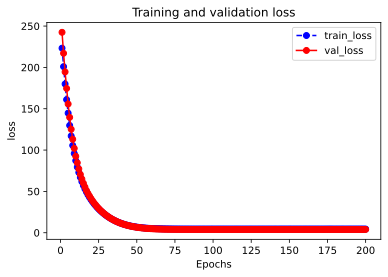

In [10]:
plot_metric(dfhistory,"loss")

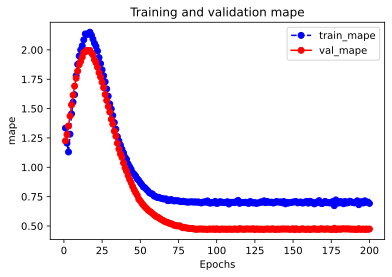

In [11]:
plot_metric(dfhistory,"mape")

In [12]:
# 预测
dl = DataLoader(TensorDataset(X))
model.predict(dl)[0:10]

tensor([[ 1.2546e+01],
        [-1.2750e+00],
        [ 2.7325e+01],
        [-2.6471e-02],
        [ 1.8584e+01],
        [ 1.2564e+01],
        [ 1.7706e+01],
        [-6.3900e-01],
        [-8.9082e+00],
        [ 2.6054e+01]])

In [13]:
# 预测
model.predict(dl_valid)[0:10]

tensor([[-6.8805],
        [15.1839],
        [10.3080],
        [18.0470],
        [13.7636],
        [ 2.2375],
        [ 8.9303],
        [11.5763],
        [ 2.9941],
        [13.1380]])

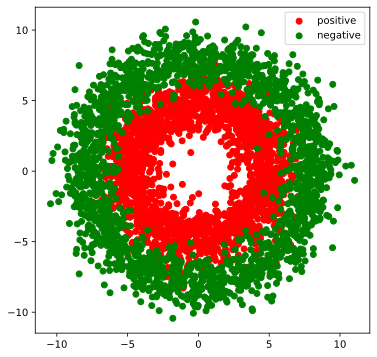

In [14]:
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt
import torch
from torch import nn
import torch.nn.functional as F
from torch.utils.data import Dataset,DataLoader,TensorDataset
import torchkeras 
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

#正负样本数量
n_positive,n_negative = 2000,2000

#生成正样本, 小圆环分布
r_p = 5.0 + torch.normal(0.0,1.0,size = [n_positive,1]) 
theta_p = 2*np.pi*torch.rand([n_positive,1])
Xp = torch.cat([r_p*torch.cos(theta_p),r_p*torch.sin(theta_p)],axis = 1)
Yp = torch.ones_like(r_p)

#生成负样本, 大圆环分布
r_n = 8.0 + torch.normal(0.0,1.0,size = [n_negative,1]) 
theta_n = 2*np.pi*torch.rand([n_negative,1])
Xn = torch.cat([r_n*torch.cos(theta_n),r_n*torch.sin(theta_n)],axis = 1)
Yn = torch.zeros_like(r_n)

#汇总样本
X = torch.cat([Xp,Xn],axis = 0)
Y = torch.cat([Yp,Yn],axis = 0)


#可视化
plt.figure(figsize = (6,6))
plt.scatter(Xp[:,0],Xp[:,1],c = "r")
plt.scatter(Xn[:,0],Xn[:,1],c = "g")
plt.legend(["positive","negative"]);

In [15]:
ds = TensorDataset(X,Y)

ds_train,ds_valid = torch.utils.data.random_split(ds,[int(len(ds)*0.7),len(ds)-int(len(ds)*0.7)])
dl_train = DataLoader(ds_train,batch_size = 100,shuffle=True,num_workers=2)
dl_valid = DataLoader(ds_valid,batch_size = 100,num_workers=2)

In [16]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(2,4)
        self.fc2 = nn.Linear(4,8) 
        self.fc3 = nn.Linear(8,1)
        
    def forward(self,x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        y = nn.Sigmoid()(self.fc3(x))
        return y
        
model = torchkeras.Model(Net())
model.summary(input_shape =(2,))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                    [-1, 4]              12
            Linear-2                    [-1, 8]              40
            Linear-3                    [-1, 1]               9
Total params: 61
Trainable params: 61
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.000008
Forward/backward pass size (MB): 0.000099
Params size (MB): 0.000233
Estimated Total Size (MB): 0.000340
----------------------------------------------------------------


In [17]:
# 准确率
def accuracy(y_pred,y_true):
    y_pred = torch.where(y_pred>0.5,torch.ones_like(y_pred,dtype = torch.float32),
                      torch.zeros_like(y_pred,dtype = torch.float32))
    acc = torch.mean(1-torch.abs(y_true-y_pred))
    return acc

model.compile(loss_func = nn.BCELoss(),optimizer= torch.optim.Adam(model.parameters(),lr = 0.01),
             metrics_dict={"accuracy":accuracy})

dfhistory = model.fit(100,dl_train = dl_train,dl_val = dl_valid,log_step_freq = 10)

Start Training ...

================================================================================2021-09-27 12:34:05
{'step': 10, 'loss': 0.671, 'accuracy': 0.553}
{'step': 20, 'loss': 0.664, 'accuracy': 0.552}

 +-------+-------+----------+----------+--------------+
| epoch |  loss | accuracy | val_loss | val_accuracy |
+-------+-------+----------+----------+--------------+
|   1   | 0.657 |  0.572   |  0.643   |    0.571     |
+-------+-------+----------+----------+--------------+

================================================================================2021-09-27 12:34:06
{'step': 10, 'loss': 0.635, 'accuracy': 0.571}
{'step': 20, 'loss': 0.63, 'accuracy': 0.595}

 +-------+-------+----------+----------+--------------+
| epoch |  loss | accuracy | val_loss | val_accuracy |
+-------+-------+----------+----------+--------------+
|   2   | 0.626 |  0.602   |   0.61   |    0.641     |
+-------+-------+----------+----------+--------------+

=====================================


 +-------+-------+----------+----------+--------------+
| epoch |  loss | accuracy | val_loss | val_accuracy |
+-------+-------+----------+----------+--------------+
|   18  | 0.175 |  0.927   |  0.206   |     0.92     |
+-------+-------+----------+----------+--------------+

================================================================================2021-09-27 12:34:31
{'step': 10, 'loss': 0.171, 'accuracy': 0.931}
{'step': 20, 'loss': 0.184, 'accuracy': 0.928}

 +-------+-------+----------+----------+--------------+
| epoch |  loss | accuracy | val_loss | val_accuracy |
+-------+-------+----------+----------+--------------+
|   19  | 0.176 |  0.932   |  0.208   |    0.915     |
+-------+-------+----------+----------+--------------+

================================================================================2021-09-27 12:34:33
{'step': 10, 'loss': 0.18, 'accuracy': 0.929}
{'step': 20, 'loss': 0.176, 'accuracy': 0.932}

 +-------+-------+----------+----------+--------------+


{'step': 10, 'loss': 0.153, 'accuracy': 0.938}
{'step': 20, 'loss': 0.16, 'accuracy': 0.936}

 +-------+-------+----------+----------+--------------+
| epoch |  loss | accuracy | val_loss | val_accuracy |
+-------+-------+----------+----------+--------------+
|   36  | 0.167 |   0.93   |  0.215   |    0.923     |
+-------+-------+----------+----------+--------------+

================================================================================2021-09-27 12:34:57
{'step': 10, 'loss': 0.173, 'accuracy': 0.92}
{'step': 20, 'loss': 0.166, 'accuracy': 0.927}

 +-------+-------+----------+----------+--------------+
| epoch |  loss | accuracy | val_loss | val_accuracy |
+-------+-------+----------+----------+--------------+
|   37  | 0.171 |  0.929   |  0.202   |    0.922     |
+-------+-------+----------+----------+--------------+

================================================================================2021-09-27 12:34:59
{'step': 10, 'loss': 0.176, 'accuracy': 0.925}
{'step': 20

{'step': 10, 'loss': 0.17, 'accuracy': 0.929}
{'step': 20, 'loss': 0.173, 'accuracy': 0.927}

 +-------+-------+----------+----------+--------------+
| epoch |  loss | accuracy | val_loss | val_accuracy |
+-------+-------+----------+----------+--------------+
|   54  | 0.175 |  0.928   |   0.19   |    0.931     |
+-------+-------+----------+----------+--------------+

================================================================================2021-09-27 12:35:25
{'step': 10, 'loss': 0.174, 'accuracy': 0.928}
{'step': 20, 'loss': 0.162, 'accuracy': 0.934}

 +-------+-------+----------+----------+--------------+
| epoch |  loss | accuracy | val_loss | val_accuracy |
+-------+-------+----------+----------+--------------+
|   55  | 0.166 |   0.93   |  0.203   |    0.925     |
+-------+-------+----------+----------+--------------+

================================================================================2021-09-27 12:35:26
{'step': 10, 'loss': 0.173, 'accuracy': 0.93}
{'step': 20

{'step': 10, 'loss': 0.165, 'accuracy': 0.937}
{'step': 20, 'loss': 0.169, 'accuracy': 0.933}

 +-------+-------+----------+----------+--------------+
| epoch |  loss | accuracy | val_loss | val_accuracy |
+-------+-------+----------+----------+--------------+
|   72  | 0.167 |  0.931   |  0.198   |    0.923     |
+-------+-------+----------+----------+--------------+

================================================================================2021-09-27 12:35:51
{'step': 10, 'loss': 0.17, 'accuracy': 0.924}
{'step': 20, 'loss': 0.167, 'accuracy': 0.929}

 +-------+------+----------+----------+--------------+
| epoch | loss | accuracy | val_loss | val_accuracy |
+-------+------+----------+----------+--------------+
|   73  | 0.17 |  0.926   |  0.209   |    0.922     |
+-------+------+----------+----------+--------------+

================================================================================2021-09-27 12:35:53
{'step': 10, 'loss': 0.162, 'accuracy': 0.933}
{'step': 20, 'l

{'step': 10, 'loss': 0.175, 'accuracy': 0.928}
{'step': 20, 'loss': 0.166, 'accuracy': 0.929}

 +-------+------+----------+----------+--------------+
| epoch | loss | accuracy | val_loss | val_accuracy |
+-------+------+----------+----------+--------------+
|   90  | 0.17 |  0.929   |   0.19   |    0.928     |
+-------+------+----------+----------+--------------+

================================================================================2021-09-27 12:36:18
{'step': 10, 'loss': 0.168, 'accuracy': 0.929}
{'step': 20, 'loss': 0.172, 'accuracy': 0.928}

 +-------+-------+----------+----------+--------------+
| epoch |  loss | accuracy | val_loss | val_accuracy |
+-------+-------+----------+----------+--------------+
|   91  | 0.163 |  0.933   |  0.189   |    0.926     |
+-------+-------+----------+----------+--------------+

================================================================================2021-09-27 12:36:20
{'step': 10, 'loss': 0.153, 'accuracy': 0.935}
{'step': 20, '

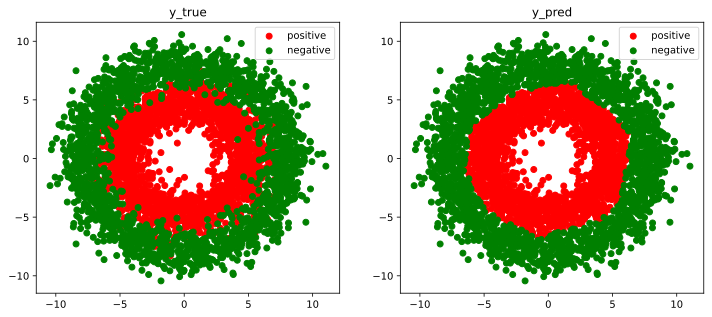

In [18]:
# 结果可视化
fig, (ax1,ax2) = plt.subplots(nrows=1,ncols=2,figsize = (12,5))
ax1.scatter(Xp[:,0],Xp[:,1], c="r")
ax1.scatter(Xn[:,0],Xn[:,1],c = "g")
ax1.legend(["positive","negative"]);
ax1.set_title("y_true");

Xp_pred = X[torch.squeeze(model.forward(X)>=0.5)]
Xn_pred = X[torch.squeeze(model.forward(X)<0.5)]

ax2.scatter(Xp_pred[:,0],Xp_pred[:,1],c = "r")
ax2.scatter(Xn_pred[:,0],Xn_pred[:,1],c = "g")
ax2.legend(["positive","negative"]);
ax2.set_title("y_pred");

In [19]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

import matplotlib.pyplot as plt

def plot_metric(dfhistory, metric):
    train_metrics = dfhistory[metric]
    val_metrics = dfhistory['val_'+metric]
    epochs = range(1, len(train_metrics) + 1)
    plt.plot(epochs, train_metrics, 'bo--')
    plt.plot(epochs, val_metrics, 'ro-')
    plt.title('Training and validation '+ metric)
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend(["train_"+metric, 'val_'+metric])
    plt.show()

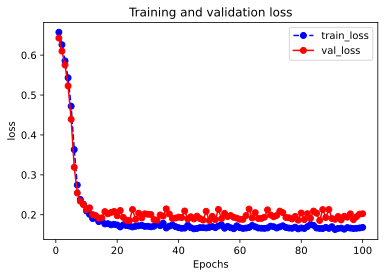

In [20]:
plot_metric(dfhistory,"loss")

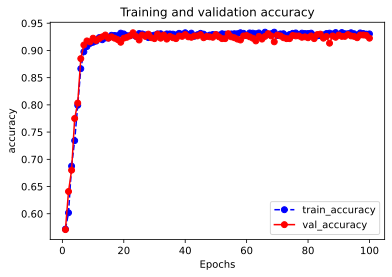

In [21]:
plot_metric(dfhistory,"accuracy")

In [22]:
model.evaluate(dl_valid)

{'val_loss': 0.20245358099540076, 'val_accuracy': 0.9225000043710073}

In [24]:
model.predict(dl_valid)[0:10]

tensor([[9.8590e-01],
        [9.7227e-01],
        [9.9717e-01],
        [5.0849e-05],
        [5.6281e-04],
        [1.1733e-03],
        [1.3738e-03],
        [6.4170e-04],
        [2.2698e-04],
        [9.9815e-01]])